In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import power_transform
from scipy.stats import skew
import math
import warnings

In [64]:
warnings.filterwarnings('ignore')


In [65]:
data = pd.read_csv('indexProcessed.csv')
data.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


### Data Quality Report

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Date       104224 non-null  object 
 2   Open       104224 non-null  float64
 3   High       104224 non-null  float64
 4   Low        104224 non-null  float64
 5   Close      104224 non-null  float64
 6   Adj Close  104224 non-null  float64
 7   Volume     104224 non-null  float64
 8   CloseUSD   104224 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.2+ MB


In [67]:
data_quality_report = data.describe()

In [68]:
data_quality_report

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,1.042240e+05,104224.000000
mean,8015.353334,8063.324234,7962.581120,8014.366642,8014.161269,1.347646e+09,3046.729177
std,9140.563404,9196.575802,9082.767802,9140.609758,9140.720456,4.427662e+09,3747.865623
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00,10.204900
25%,2046.887756,2057.213990,2037.185943,2047.506470,2047.358490,0.000000e+00,320.460898
50%,5772.140137,5812.764892,5725.199951,5773.710205,5773.710205,9.529000e+05,1371.598486
75%,10487.377445,10552.179690,10416.092287,10488.622560,10488.622560,2.064676e+08,4383.045241
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10,18934.376173


In [69]:
columns = list(data_quality_report.columns)
print(columns)
data_quality_report.loc[len(data_quality_report.index)]  = [len(data[i].unique()) for i in columns]
data_quality_report.rename(index ={8:'Cardinality'},inplace=True)
data_quality_report

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'CloseUSD']


,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,1.042240e+05,104224.000000
mean,8015.353334,8063.324234,7962.581120,8014.366642,8014.161269,1.347646e+09,3046.729177
std,9140.563404,9196.575802,9082.767802,9140.609758,9140.720456,4.427662e+09,3747.865623
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00,10.204900
25%,2046.887756,2057.213990,2037.185943,2047.506470,2047.358490,0.000000e+00,320.460898
50%,5772.140137,5812.764892,5725.199951,5773.710205,5773.710205,9.529000e+05,1371.598486
75%,10487.377445,10552.179690,10416.092287,10488.622560,10488.622560,2.064676e+08,4383.045241
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10,18934.376173
Cardinality,96716.000000,96830.000000,96663.000000,96764.000000,97602.000000,5.056100e+04,99179.000000


#### checking for duplicate columns

In [70]:
sub_amt = data['Close'] - data['Adj Close']

In [71]:
# thus no duplicates present
sub_amt.unique()

array([0.      , 0.047364, 0.048828, ..., 0.006836, 0.006835, 0.006836])

In [72]:
# since all of these are continuous columns hence checking for outliers
lower_quartile = list(data_quality_report.loc['25%',:])
upper_quartile = list(data_quality_report.loc['75%',:])
IQR = list(np.subtract(upper_quartile,lower_quartile))
upper_threshold = list(np.add(upper_quartile,np.multiply(1.5,IQR)))
lower_threshold = list(np.subtract(lower_quartile,np.multiply(1.5,IQR)))



In [73]:
upper_threshold

[23148.111978499997,
 23294.628240749997,
 22984.451803875,
 23150.296694999997,
 23150.518665375,
 516169000.0,
 10476.9217545175]

In [74]:
lower_threshold

[-10613.846777499999,
 -10685.23456125,
 -10531.173573125,
 -10614.167664999999,
 -10614.537615624999,
 -309701400.0,
 -5773.4156152225]

In [75]:
num_outliers_upper = [len(data[data[columns[i]]>upper_threshold[i]]) for i in range(len(columns))]
num_outliers_lower = [len(data[data[columns[i]]<lower_threshold[i]]) for i in range(len(columns))]
total_outliers = list(np.add(num_outliers_upper,num_outliers_lower))
total_outliers

[5405, 5392, 5415, 5396, 5396, 21161, 6933]

In [76]:
# percentage of outliers among data
total_outliers_percentage = [total_outliers[i]/len(data[columns[i]]) for i in range(len(columns))]

In [77]:
total_outliers_percentage

[0.051859456555112066,
 0.05173472520724593,
 0.051955403745778325,
 0.05177310408351243,
 0.05177310408351243,
 0.20303385016886705,
 0.06652018728891618]

In [78]:
# finding indexes of columns with value greater than upper bound 
index_list = []
for i in range(len(columns)):
    print("verify column name {0} and number of outliers is {1}".format(columns[i]
,len(data[data[columns[i]]>upper_threshold[i]])))
    index_list.append(list(data[data[columns[i]]>upper_threshold[i]].index))

verify column name Open and number of outliers is 5405
verify column name High and number of outliers is 5392
verify column name Low and number of outliers is 5415
verify column name Close and number of outliers is 5396
verify column name Adj Close and number of outliers is 5396
verify column name Volume and number of outliers is 21161
verify column name CloseUSD and number of outliers is 6933


In [79]:
# clamping with upper bound
count = 0
for j in index_list:
    #print('columns is {0}'.format(columns[count]))
    for k in j:
        if(columns[count]!='Rank'):
            data.loc[k,columns[count]] = upper_threshold[count]
            #print("Replacing {0} with {1}".format(data.loc[k,columns[count]],upper_bound_columns[count]))
            #print('Final Value is {0}'.format(data.loc[k,columns[count]]))
    count = count + 1

In [80]:
# lets verify if it worked or not
for i in range(len(columns)):
    print("verify column name {0} and number of outliers is {1}".format(columns[i]
,len(data[data[columns[i]]>upper_threshold[i]])))

verify column name Open and number of outliers is 0
verify column name High and number of outliers is 0
verify column name Low and number of outliers is 0
verify column name Close and number of outliers is 0
verify column name Adj Close and number of outliers is 0
verify column name Volume and number of outliers is 0
verify column name CloseUSD and number of outliers is 0


In [81]:
# Repeating for lower bound columns
index_list_lower = []
for i in range(len(columns)):
    print("verify column name {0} and number of outliers is {1}".format(columns[i]
,len(data[data[columns[i]]<lower_threshold[i]])))
    index_list_lower.append(list(data[data[columns[i]]<lower_threshold[i]].index))

verify column name Open and number of outliers is 0
verify column name High and number of outliers is 0
verify column name Low and number of outliers is 0
verify column name Close and number of outliers is 0
verify column name Adj Close and number of outliers is 0
verify column name Volume and number of outliers is 0
verify column name CloseUSD and number of outliers is 0


In [82]:
# lets verify if it worked or not
for i in range(len(columns)):
    print("verify column name {0} and number of outliers is {1}".format(columns[i]
,len(data[data[columns[i]]<lower_threshold[i]])))

verify column name Open and number of outliers is 0
verify column name High and number of outliers is 0
verify column name Low and number of outliers is 0
verify column name Close and number of outliers is 0
verify column name Adj Close and number of outliers is 0
verify column name Volume and number of outliers is 0
verify column name CloseUSD and number of outliers is 0


### Now that the outliers have been clamped the distribution can be seen

column Open with skew is 1.0490705857692206
column High with skew is 1.0487082274336792
column Low with skew is 1.0493896754774557
column Close with skew is 1.049371116812135
column Adj Close with skew is 1.0493699787140915
column Volume with skew is 1.149690278651302
column CloseUSD with skew is 1.158832042606275


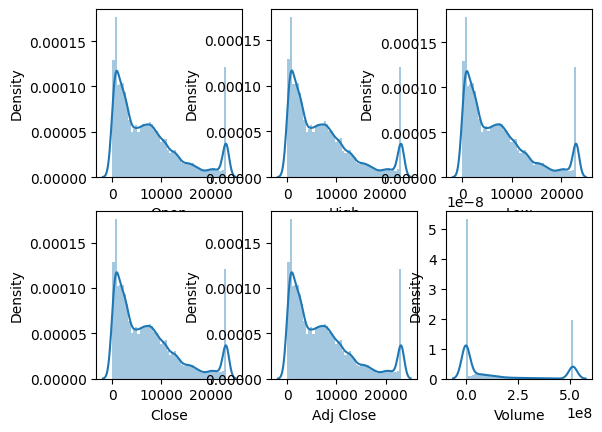

In [83]:
fig , axes = plt.subplots(2,3)
sns.distplot(data['Open'],kde=True,ax=axes[0,0])
sns.distplot(data['High'],kde=True,ax=axes[0,1])
sns.distplot(data['Low'],kde=True,ax=axes[0,2])
sns.distplot(data['Close'],kde=True,ax=axes[1,0])
sns.distplot(data['Adj Close'],kde=True,ax=axes[1,1])
sns.distplot(data['Volume'],kde=True,ax=axes[1,2])

for i in columns:
    print("column {0} with skew is {1}".format(i,skew(data[i],axis=0,bias=True)))


In [84]:
# Method 1 Standardizing the data
scaler = StandardScaler()
data_standardized = data[columns]
scaler.fit_transform(data_standardized)
data_standardized

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013
...,...,...,...,...,...,...,...
104219,23148.111978,23294.628241,22984.451804,23150.296695,23150.518665,0.0,4625.367578
104220,23148.111978,23294.628241,22984.451804,23150.296695,23150.518665,0.0,4627.575859
104221,23148.111978,23294.628241,22984.451804,23150.296695,23150.518665,0.0,4685.817500
104222,23148.111978,23294.628241,22984.451804,23150.296695,23150.518665,0.0,4728.840157


column Open with skew is 1.0490705857692206
column High with skew is 1.0487082274336792
column Low with skew is 1.0493896754774557
column Close with skew is 1.049371116812135
column Adj Close with skew is 1.0493699787140915
column Volume with skew is 1.149690278651302
column CloseUSD with skew is 1.158832042606275


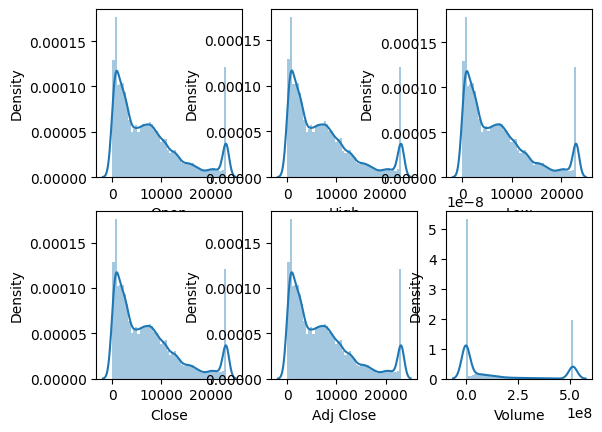

In [85]:
fig , axes = plt.subplots(2,3)
sns.distplot(data_standardized['Open'],kde=True,ax=axes[0,0])
sns.distplot(data_standardized['High'],kde=True,ax=axes[0,1])
sns.distplot(data_standardized['Low'],kde=True,ax=axes[0,2])
sns.distplot(data_standardized['Close'],kde=True,ax=axes[1,0])
sns.distplot(data_standardized['Adj Close'],kde=True,ax=axes[1,1])
sns.distplot(data_standardized['Volume'],kde=True,ax=axes[1,2])

for i in columns:
    print("column {0} with skew is {1}".format(i,skew(data_standardized[i],axis=0,bias=True)))


In [86]:
columns

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'CloseUSD']

skewness of Open is -0.8845229030294431
skewness of High is -0.8861047600811457
skewness of Low is -0.8829531436738864
skewness of CLose is -0.8846302963076944
skewness of Adj Close is -0.884426082529379
skewness of Volume is -0.21441551016685817
skewness of CLose USD is -0.4017574833885646


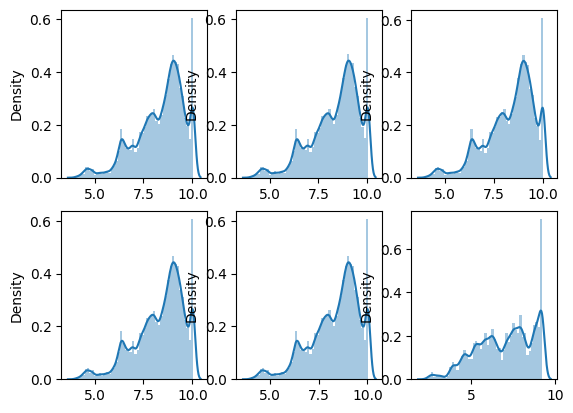

In [87]:
# no change using log transform
log_open = [math.log(i) for i in data['Open']]
log_high = [math.log(i) for i in data['High']]
log_low  = [math.log(i) for i in data['Low']]
log_close= [math.log(i) for i in data['Close']]
log_adjclose = [math.log(i) for i in data['Adj Close']]
log_volume = [math.log(i) if i!=0 else 0 for i in data['Volume']]
log_closeusd = [math.log(i) for i in data['CloseUSD']]

fig,axes = plt.subplots(2,3)
sns.distplot(log_open,kde=True,ax=axes[0,0])
sns.distplot(log_high,kde=True,ax=axes[0,1])
sns.distplot(log_low,kde=True,ax=axes[0,2])
sns.distplot(log_close,kde=True,ax=axes[1,0])
sns.distplot(log_adjclose,kde=True,ax=axes[1,1])
sns.distplot(log_closeusd,kde=True,ax=axes[1,2])

print('skewness of Open is {0}'.format(skew(log_open,axis=0,bias=True)))
print('skewness of High is {0}'.format(skew(log_high,axis=0,bias=True)))
print('skewness of Low is {0}'.format(skew(log_low,axis=0,bias=True)))
print('skewness of CLose is {0}'.format(skew(log_close,axis=0,bias=True)))
print('skewness of Adj Close is {0}'.format(skew(log_adjclose,axis=0,bias=True)))
print('skewness of Volume is {0}'.format(skew(log_volume,axis=0,bias=True)))
print('skewness of CLose USD is {0}'.format(skew(log_closeusd,axis=0,bias=True)))





skewness of Open is -0.10947407552875141
skewness of High is -0.10975837762828587
skewness of Low is -0.10917758036970594
skewness of CLose is -0.10943484032121828
skewness of Adj Close is -0.1094310847747777
skewness of Volume is -0.15284777250342124
skewness of CLose USD is -0.07649566697395607


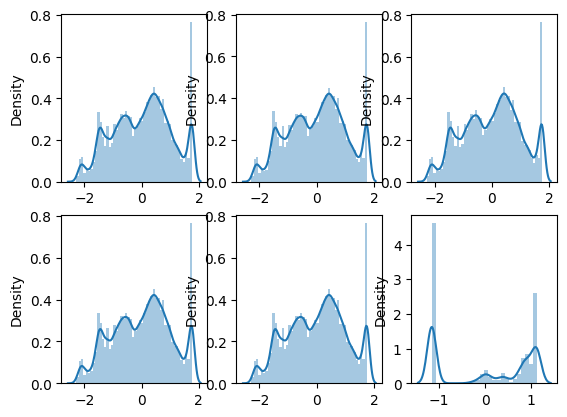

In [93]:
# no change using log transform
boxcox_open = list(power_transform(data[['Open']], method='box-cox'))
boxcox_open_fit = [i[0] for i in boxcox_open]

boxcox_high = list(power_transform(data[['High']], method='box-cox'))
boxcox_high_fit = [i[0] for i in boxcox_high]

boxcox_low = list(power_transform(data[['Low']], method='box-cox'))
boxcox_low_fit = [i[0] for i in boxcox_low]

boxcox_close = list(power_transform(data[['Close']], method='box-cox'))
boxcox_close_fit = [i[0] for i in boxcox_close]

boxcox_adjclose = list(power_transform(data[['Adj Close']], method='box-cox'))
boxcox_adjclose_fit = [i[0] for i in boxcox_adjclose]

volume_data = list(data['Volume'])
volume_data = np.add(volume_data,[1 in range(len(volume_data))])
volume_data = list(volume_data.reshape(-1,1))
boxcox_volume = list(power_transform(volume_data, method='box-cox'))
boxcox_volume_fit = [i[0] for i in boxcox_volume]

boxcox_closeusd = list(power_transform(data[['CloseUSD']], method='box-cox'))
boxcox_closeusd_fit = [i[0] for i in boxcox_closeusd]






fig,axes = plt.subplots(2,3)
sns.distplot(boxcox_open_fit,kde=True,ax=axes[0,0])
sns.distplot(boxcox_high_fit,kde=True,ax=axes[0,1])
sns.distplot(boxcox_low_fit,kde=True,ax=axes[0,2])
sns.distplot(boxcox_close_fit,kde=True,ax=axes[1,0])
sns.distplot(boxcox_adjclose_fit,kde=True,ax=axes[1,1])
sns.distplot(boxcox_volume_fit,kde=True,ax=axes[1,2])

print('skewness of Open is {0}'.format(skew(boxcox_open_fit,axis=0,bias=True)))
print('skewness of High is {0}'.format(skew(boxcox_high_fit,axis=0,bias=True)))
print('skewness of Low is {0}'.format(skew(boxcox_low_fit,axis=0,bias=True)))
print('skewness of CLose is {0}'.format(skew(boxcox_close_fit,axis=0,bias=True)))
print('skewness of Adj Close is {0}'.format(skew(boxcox_adjclose_fit,axis=0,bias=True)))
print('skewness of Volume is {0}'.format(skew(boxcox_volume_fit,axis=0,bias=True)))
print('skewness of CLose USD is {0}'.format(skew(boxcox_closeusd_fit,axis=0,bias=True)))



